# Image Processing

In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data_path = './data/'

## < Access pixel values and modify >

(256, 256, 3)


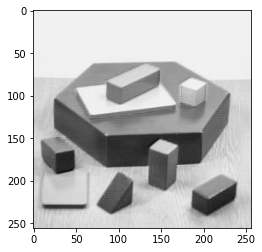

In [3]:
block_img = cv2.imread(data_path + 'blox.jpg', 1)
block_img = cv2.cvtColor(block_img, cv2.COLOR_BGR2RGB)
print(block_img.shape)
plt.imshow(block_img)

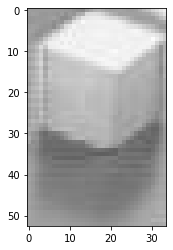

In [4]:
plt.imshow(block_img[79:132, 170:204,:])

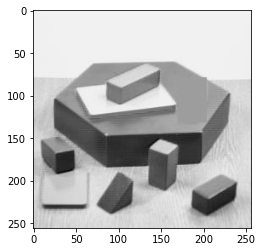

In [5]:
block_img[79:132, 170:204,:] = block_img[79,170,:]
plt.imshow(block_img)

(467, 709, 3)


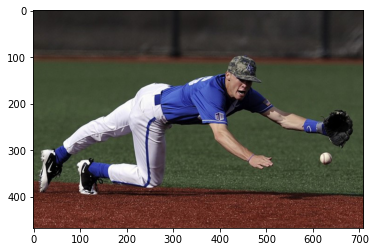

In [6]:
baseball_img = cv2.imread(data_path+'baseball_player.jpg')
baseball_img = cv2.cvtColor(baseball_img, cv2.COLOR_BGR2RGB)
print(baseball_img.shape)
plt.imshow(baseball_img)

In [7]:
#to do : Make it look like two balls
# ball [305:332, 614:641]

## < Brightness Caculation >

#### cv2.add(src1, src2)
Sum images by saturation sum 

#### cv2.subtract(src1, src2)
subtract images by saturation sum 

#### cv2.multiply(src1, src2)
multiply images by saturation sum 

#### cv2.divide(src1, src2)
di images by saturation sum 

#### cv2.addWdighted(src1, alpha, src2, beta)
Sum weighted images

(768, 1024, 3)
(768, 1024, 3)


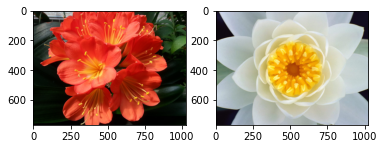

In [8]:
flower1 = cv2.imread(data_path+"flower1.jpg")
flower2 = cv2.imread(data_path+"flower2.jpg")
flower1 = cv2.cvtColor(flower1, cv2.COLOR_BGR2RGB)
flower2 = cv2.cvtColor(flower2, cv2.COLOR_BGR2RGB)
print(flower1.shape)
print(flower2.shape)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.imshow(flower1)
ax2.imshow(flower2)

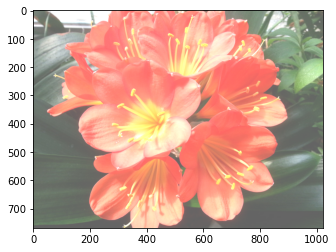

In [9]:
diff = np.zeros(flower1.shape, np.uint8)
diff += 100
addflower = cv2.add(flower1, diff)
plt.imshow(addflower)

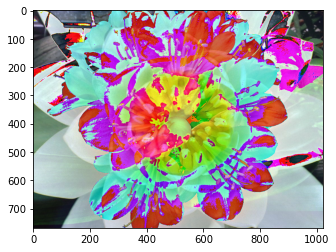

In [10]:
flower_sum1 = flower1 + flower2 
plt.imshow(flower_sum1)

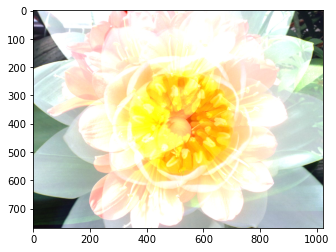

In [11]:
flower_sum2 = cv2.add(flower1, flower2)
plt.imshow(flower_sum2)

In [12]:
x = np.uint8([250])
y = np.uint8([10])

print (cv2.add(x,y)) # 250+10 = 260 => 255
print (x+y) # 250+10 = 260 % 256 = 4

[[255]]
[4]


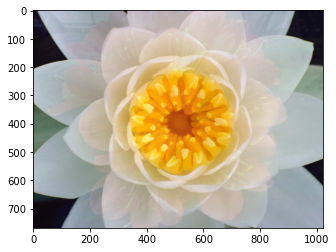

In [13]:
flower_sum3 = cv2.addWeighted(flower1, 0.1, flower2, 0.9,0)
plt.imshow(flower_sum3)

## < Changing Color-space >

#### cv2.cvtColor(src, code)
There are more than 150 color-space conversion methods available in OpenCV

- Color changing code

cv2.COLOR_BGR2GRAY

cv2.COLOR_BGR2HSV

....

In [14]:
color = np.array([[[255,0,0]]], dtype=np.uint8)
color_hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
color_h = color_hsv[0,0,0]
lower_color = np.array([color_h - 10, 100, 100])  # [H-10, 100, 100]
upper_color = np.array([color_h + 10, 255, 255])  # [H+10, 255, 255]
print(color_hsv)
print(lower_color)
print(upper_color)

[[[120 255 255]]]
[110 100 100]
[130 255 255]


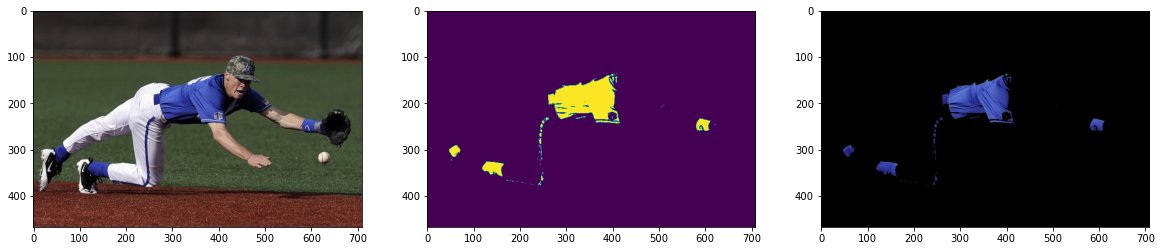

In [15]:
cvt_img = cv2.cvtColor(baseball_img, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(cvt_img, lower_color, upper_color)
result = cv2.bitwise_and(baseball_img, baseball_img, mask =mask)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches((20,8))

ax1.imshow(baseball_img)
ax2.imshow(mask)
ax3.imshow(result)

## < Image Histogram >

(600, 868)


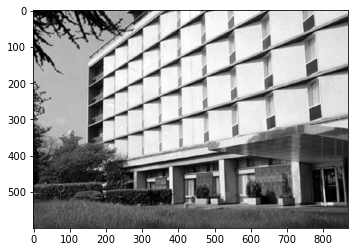

In [14]:
building_img = cv2.imread(data_path+"building.jpg", 0)
print(building_img.shape)
height = building_img.shape[0]
width = building_img.shape[1]
plt.imshow(building_img,cmap='gray')

#### cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
 
images : Source image

channels : If input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.

mask : If you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.

histSize : This represents our BIN count.

ranges : This is our RANGE. Normally, it is [0,256].

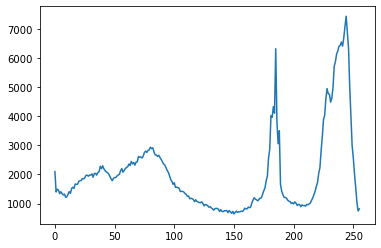

In [18]:
calchist1 = cv2.calcHist([building_img], [0], None, [256], [0,256])
plt.plot(calchist1)

In [207]:
# to do : calculate histogram
hist = [0]*256


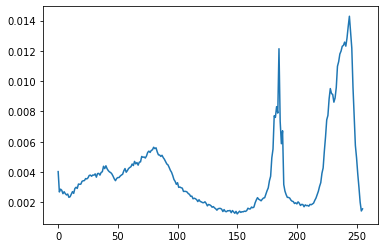

In [220]:
plt.plot(np.array(hist)/(width*height))

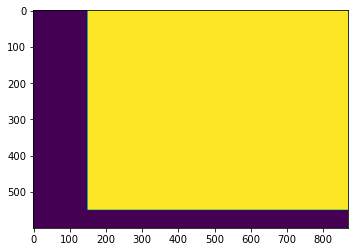

In [19]:
mask = np.zeros(building_img.shape,np.uint8)
mask[:550, 150:] = 255
plt.imshow(mask)

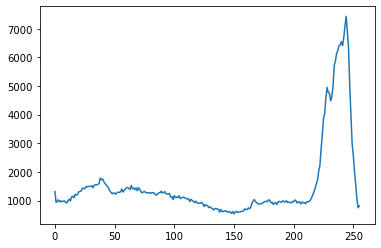

In [20]:
calchist2 = cv2.calcHist([building_img], [0], mask, [256], [0,256])
plt.plot(calchist2)

#### Histogram Equalization

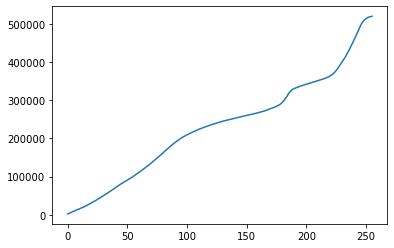

In [231]:
histC=[hist[0]]
for i in range(1,len(hist)):
    histC.append(histC[i-1]+hist[i])
histC = np.array(histC)
plt.plot(histC)

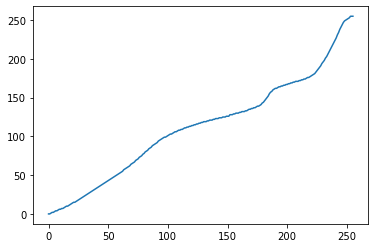

In [243]:
histC = (histC - histC.min())/(histC.max()-histC.min())*255
histC = histC.astype(np.uint8)
plt.plot(histC)

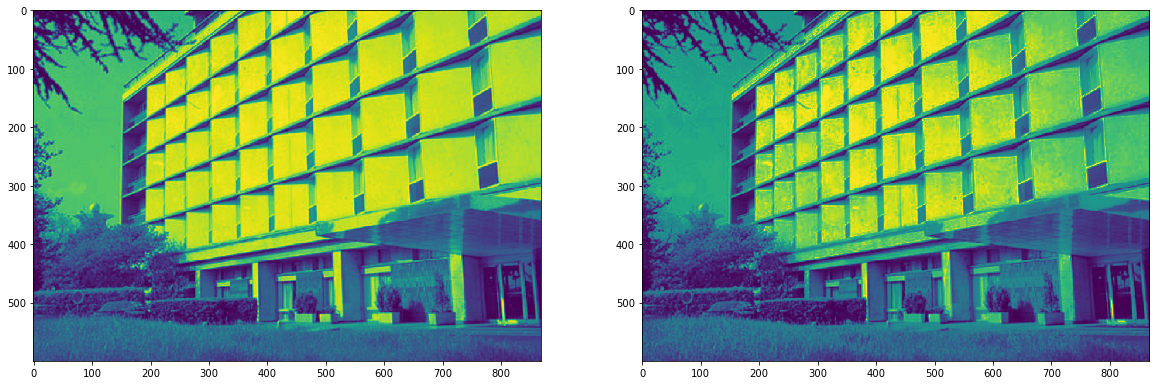

In [242]:
building_img_eq = np.zeros(building_img.shape)

for i in range(height):
    for j in range(width):
        building_img_eq[i,j] = histC[building_img[i,j]]

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.imshow(building_img)
ax2.imshow(building_img_eq)

#### cv2.equalizeHist(src)

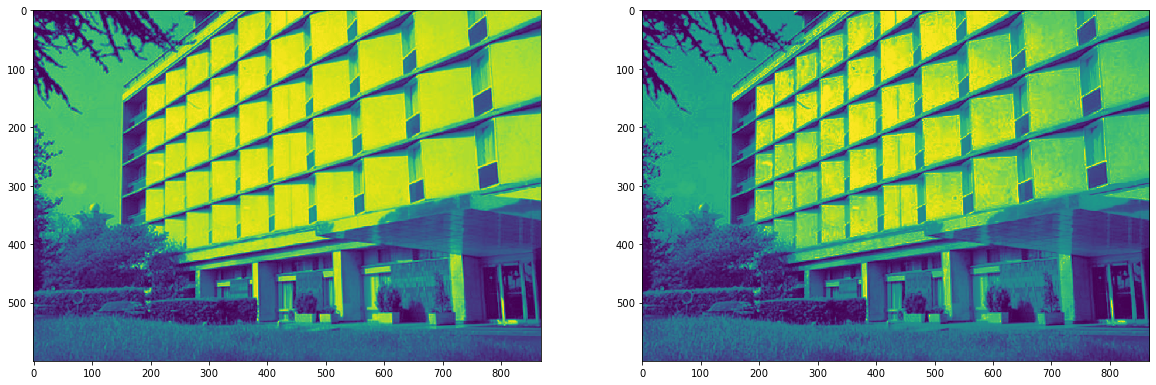

In [246]:
eq_img1 = cv2.equalizeHist(building_img)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.imshow(building_img)
ax2.imshow(eq_img1)

#### cv2.createCLAHE(clipLimit, tileGridSize)

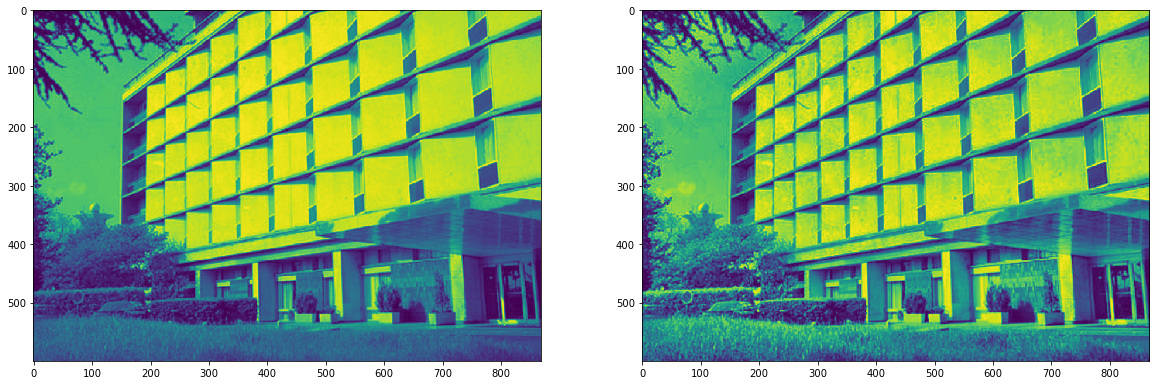

In [247]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq_img2 = clahe.apply(building_img)

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.imshow(building_img)
ax2.imshow(eq_img2)

## < Image Thresholding >

#### cv2.threshold(src, thresh, maxval, type) → retval, dst 
If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black).
 
- thresholding type
cv2.THRESH_BINARY

cv2.THRESH_BINARY_INV

cv2.THRESH_TRUNC

cv2.THRESH_TOZERO

cv2.THRESH_TOZERO_INV

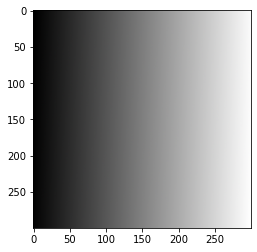

In [24]:
gradient_img = cv2.imread(data_path + "gradient.png", 1)
plt.imshow(gradient_img)

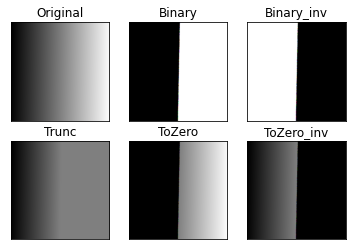

In [25]:
ret, thresh1 = cv2.threshold(gradient_img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gradient_img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gradient_img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gradient_img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gradient_img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ["Original", "Binary", "Binary_inv", "Trunc", "ToZero", "ToZero_inv"]
imgs = [gradient_img, thresh1, thresh2, thresh3 ,thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(imgs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

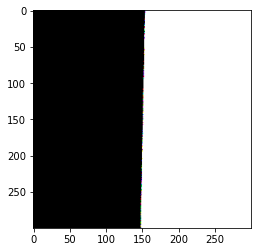

In [26]:
plt.imshow(thresh1)

#### cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)

- Adaptive Method

cv2.ADAPTIVE_THRESH_MEAN_C

cv2.ADAPTIVE_THRESH_GAUSSIAN_C

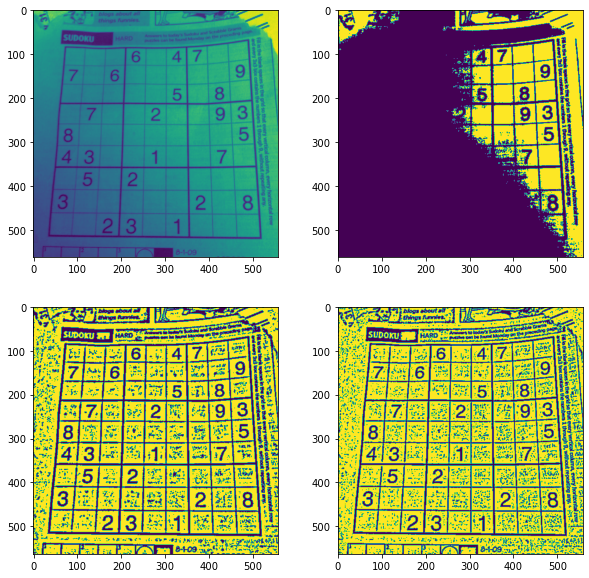

In [27]:
sudoku_img = cv2.imread(data_path + 'sudoku.png',0)

ret, th1 = cv2.threshold(sudoku_img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(sudoku_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,15,2)
th3 = cv2.adaptiveThreshold(sudoku_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,2)

titles = ['Original','Global','Mean','Gaussian']

images = [sudoku_img,th1,th2,th3]

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
ax1.imshow(sudoku_img)
ax2.imshow(th1)
ax3.imshow(th2)
ax4.imshow(th3)

#### otsu binarization

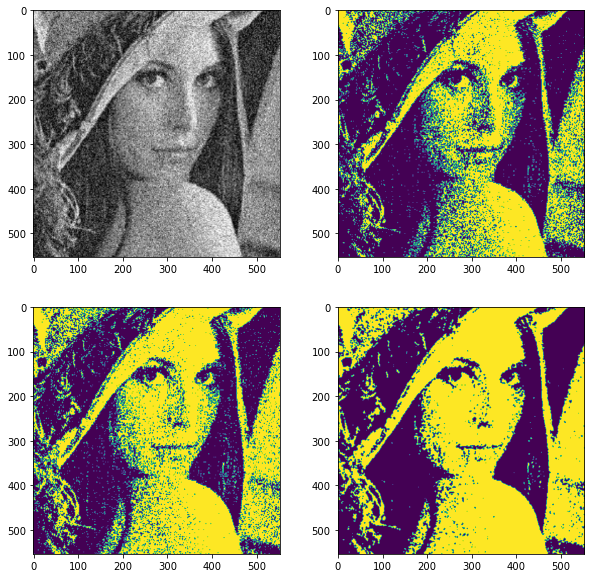

In [29]:
lena_img_c = cv2.imread(data_path+"lena_noisy.jpg", 1)

lena_img = cv2.imread(data_path+"lena_noisy.jpg", 0)
ret, th = cv2.threshold(lena_img, 128, 255, cv2.THRESH_BINARY)
ret, otsu1 = cv2.threshold(lena_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
blur = cv2.GaussianBlur(lena_img,(5,5),0)
ret, otsu2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
ax1.imshow(cv2.cvtColor(lena_img_c,cv2.COLOR_BGR2RGB))
ax2.imshow(th)
ax3.imshow(otsu1)
ax4.imshow(otsu2)